# From a classification NN to a multiclassification NN

Last time, we were going through the steps to create a neural network to help us with a binary classification problem. We originated certain data in some specific shapes that belonged to two different groups and we created a model to identify, from new points close to those shapes, to which category would they fall into.

Now, we are going to bring an example that has been used widely for training, and thus for us this time could be helpful to go through the basics of multiclass classification. We will create a NN to classify the different types of clothing from the [fashion-mnist dataset](https://github.com/zalandoresearch/fashion-mnist)

In [50]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

print(tf.__version__)

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

2.16.2


Let's have a look on what the samples look like.

The training data will have a colour value for every pixel that forms the image of the training data.
Then, the training label will have assigned an specific number, depending on what kind of clothing we have.

In [51]:

print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

As we can't really see how the array looks like with the values, we can plot these values to have a better understanding on what we have.

In [52]:
import matplotlib.pyplot as plt
def bnwplot(image,title=None):
    """Plots a black and white picture with attached label.
    Args:
        image: specific image from the dataset
        title: Optional, added label.

    """
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title(title)

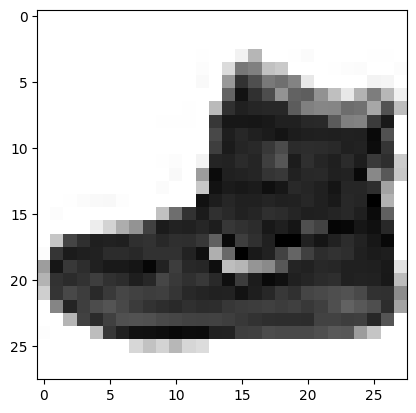

In [53]:
bnwplot(train_data[0])

We can create now an array based on the label information that we have lon the fashion-mnist repository, that relates label numbers with item description.

In [54]:
label_description = ['T-shirt','Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's check another example and assign already de name for it to the plotting.

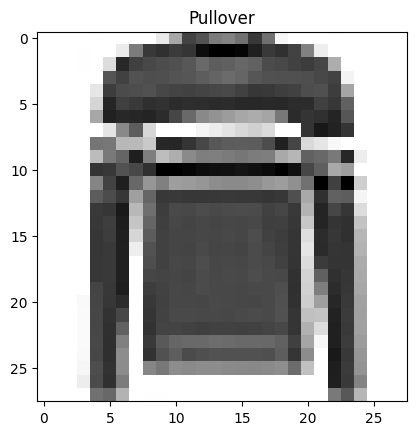

In [55]:
bnwplot(train_data[5],label_description[train_labels[5]])

Let's try to follow building a model that could attempt to predict types of clothing, training it with a part of our dataset.

Going back to the TF-classifiers document we have created before, these are the steps to start modelling our new neural network:


1.  **Create a model**, where we decide the size, number and type of the layers.

2.  **Compile the model**, where we define the loss function, we choose the optimizer and decide the metrics we use to evaluate our model.

3.  **Fit the model**, where we adjust the trainning data to our model and examinate how the model interacts and learns with that data.


In [56]:
# First, import separately the libraries we might need. We already imported before tensorflow to load the dataset.
import numpy as np

To properly build the different layers, specially the input layers, we need to know what kind of shape we are dealing with in our dataset. Let's take a look :

In [57]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

This means we have 60000 images of 28 x 28 with a single colour dimension for training, and thus we will represent this in b&w.

## Creating the model for a multiclass clasification

When we create our model, we first set a random seed to ensure our results are easier to reproduce.

Then, we choose the amount of layers, determining the type of activation and the amount of neurons per layer.

Once decided the type of internal architecture our layers are having, we decide the way the weights get optimized with the type of optimizer and the type of calculation used to determine the loss, or how deviates the results compared to the actual label from the data we are training with.

To end, we fit the model, so we iterate a certain number of epochs to go through this iteration with the loss and deviation values we obtain while training our model.

So first, for the activation, we can check the different types of activation from the [Tensorflow guide](https://www.tensorflow.org/api_docs/python/tf/keras/activations).

For the output layer, we are going to use [softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax), as the result could be interpreted as a probability distribution for the different possibilities to categorize the elements.

As we have 10 possible results for classification ( one per integer value ), we need to set that same number of neurons for the output layer.

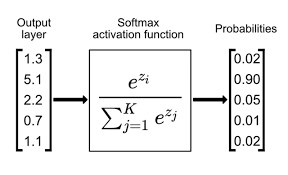

As for the hidden layers, [Relu](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu) is a good activation function as is a fairly simple function that ensures fast trainings. The explanation is that Relu outputs the max values multiplied by the weight of the neuron, which is an easy operation while allowing to have a certain non-linearity that will help with the classification.

In [58]:
# Multiclass classification model 1

# Select random seed

tf.random.set_seed(6)

# 1. Create the model.

model_1 = tf.keras.Sequential(
    [ tf.keras.layers.Flatten(input_shape=(28, 28)), 
      tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)])

/home/david/venv39/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


For compiling the model, the loss function to use for one-hot encoded classification is the Categorial Cross-Entropy. For integer related classes, we use [Sparse Categorical Cross-Entropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy).

In [59]:
# 2. Compile the model.

model_1.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy() ,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

Let's run model_1.summary() to see how our model looks and have an idea of the number of parameters that the network is passing through.

In [60]:
model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,210 (12.54 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

Now, we fit the model and training with the data that already comes separated from the dataset.

In [61]:
# 3. Fit the model
model_1_history = model_1.fit(train_data,train_labels,epochs=10, validation_data=(test_data, test_labels))
     

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1030 - loss: 3.0384 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0981 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0984 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0984 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0985 - loss: 2.3028 -

With 30% of accuracy, there is still a big gap for improvement. Let's go through the basic steps we have to follow when we are starting to deal with a new dataset we want to work with.

## Improving our accuracy

There are two main things we must have in mind when we work with datasets to train ( and test) our neural networks : 

1. **Adapt the features** so our model can predict more efficiently.

2. **Clear the dataset**, by examining if there are unknown values that can missdirect our predictions.

As we work with images in this dataset, we only need to care about the first point.

After we have prepared the input data, we can continue experimenting with different architectures for our NN to improve its efficiency.


### Preparing the dataset

In [62]:
train_data.min(), train_data.max()

(0, 255)

For **adapting the data**, we will scale the values between [0,1] by applying max normalization.

In [63]:
train_data_norm = train_data/255
test_data_norm = test_data/255

In [64]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

We can see we can still see properly our images, but this will help our NN to perform better. Let's test this.

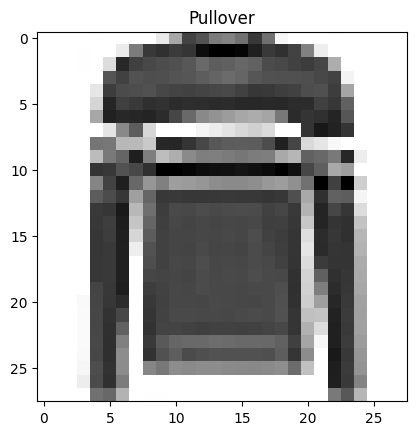

In [65]:
bnwplot(train_data_norm[5],label_description[train_labels[5]])

In [66]:
# Multiclass classification model 2
# Select random seed

tf.random.set_seed(6)

# 1. Create the model.

model_2 = tf.keras.Sequential(
    [ tf.keras.layers.Flatten(input_shape=(28, 28)), 
      tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)])

# 2. Compile the model.

model_2.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy() ,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_2_history = model_2.fit(train_data_norm,train_labels,epochs=10, validation_data=(test_data_norm, test_labels))
     

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3451 - loss: 1.7336 - val_accuracy: 0.6091 - val_loss: 1.1429
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6291 - loss: 1.0656 - val_accuracy: 0.6609 - val_loss: 0.9464
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6762 - loss: 0.9044 - val_accuracy: 0.7082 - val_loss: 0.8477
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7149 - loss: 0.8117 - val_accuracy: 0.7353 - val_loss: 0.7967
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7394 - loss: 0.7595 - val_accuracy: 0.7430 - val_loss: 0.7699
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7508 - loss: 0.7266 - val_accuracy: 0.7471 - val_loss: 0.7534
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7581 - loss: 0.7026 - val_accuracy: 0.7502 - val_loss: 0.7390
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7642 - loss: 0.6851 - 

Let's plot the differnt results to have a better comparison view about the difference we have managed just by scaling and normalizing the data.

In [67]:
import pandas as pd

# Build a quick history table function
def DataframeHistory(history):
    dataframe_history = pd.DataFrame(history.history)
    return dataframe_history

df_history_model1 = DataframeHistory(model_1_history)
df_history_model2 = DataframeHistory(model_2_history)

<Axes: title={'center': 'Model 2'}>

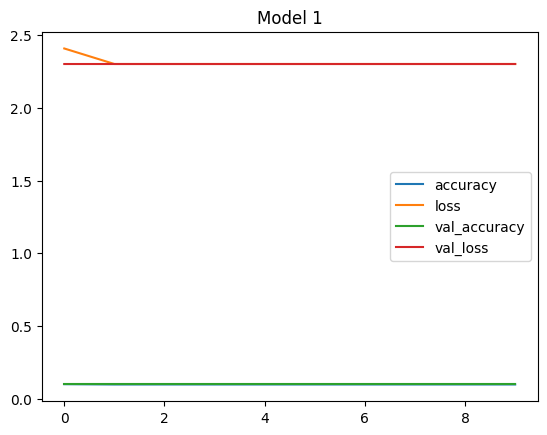

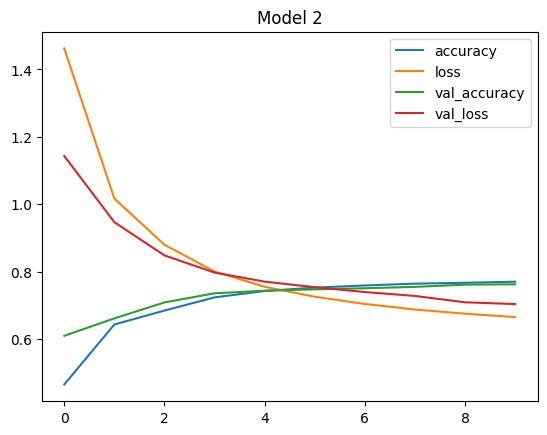

In [68]:
# Results from first model, base training data
df_history_model1.plot(title="Model 1")
# Results from second model, normalized training data
df_history_model2.plot(title="Model 2")

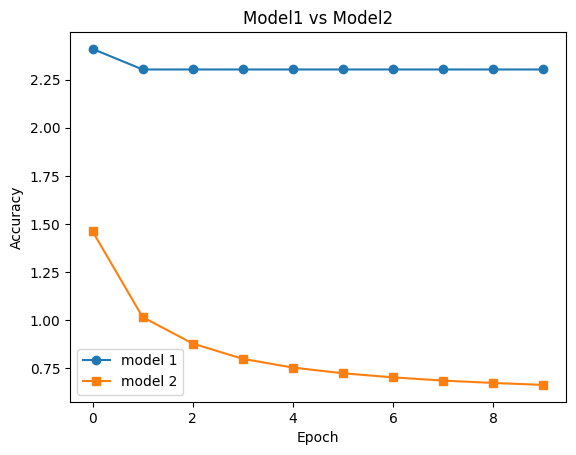

In [69]:
#Comparison of loss in one graph

plt.plot(df_history_model1['loss'],label='model 1', marker='o')
plt.plot(df_history_model2['loss'],label='model 2', marker='s')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model1 vs Model2')
plt.legend()

### Evaluating our dataset related to our Neural Network

When we use a classification model, it is important to use a Confusion Matrix to evaluate the performance and see how are our classifications actually done. Accuracy and loss are important results, but we also want to know, when we miss a classification, what was the category it was put into versus the actual category of that input.

Now we calculate some label predictions from the test data. These values are the ones calculated also when we do the validation with the test dataset, and we automatically obtain the comparison of these predicted labels against the actual labels, obtaining from it the validation accuracy and loss. This time, we are doing something a bit different : We are checking how these clothes were classified in these missed values.

In [138]:

# Make predictions with the most recent model
y_probabilities = model_2.predict(test_data_norm)

# Let's check the first 3 predictions
y_probabilities[:3]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[3.13201133e-04, 6.92754344e-04, 1.50263659e-04, 3.52834514e-03,
        4.84083110e-04, 2.53256023e-01, 8.84735899e-04, 5.73686957e-02,
        5.21923788e-03, 6.78102553e-01],
       [2.91360338e-04, 1.75203272e-27, 8.22900355e-01, 9.46627065e-12,
        1.22550011e-01, 1.27929265e-29, 5.42583577e-02, 0.00000000e+00,
        1.12664340e-08, 0.00000000e+00],
       [7.57419502e-06, 9.96346891e-01, 6.17134832e-09, 3.64508131e-03,
        1.10603283e-10, 1.89050567e-07, 3.58943346e-08, 1.93155230e-07,
        1.11357685e-14, 1.01779693e-32]], dtype=float32)

We can see from the values above, i.e. in the second results from predictions, that the 3rd element is only one value and hence, the one that is the label assigned. Others, like the first value have many possible labels and hence, the highest value is the one chosen for the label predicted.

Let's see how this would look on the code chosing the highest value and then verifying from the image.

In [139]:

# See the predicted class number and label for the first example
y_probabilities[0].argmax(), label_description[y_probabilities[0].argmax()]

(9, 'Ankle boot')

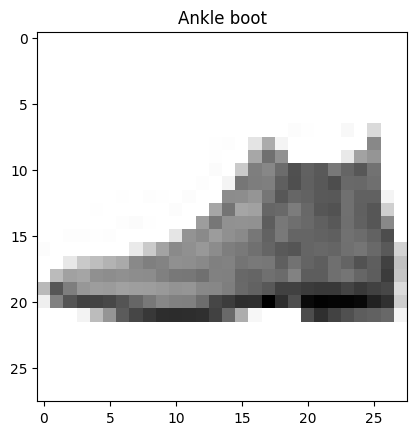

In [140]:
bnwplot(test_data_norm[0],label_description[test_labels[0]])

In [141]:
# We convert our matrix of probabilites into and array of labels.
y_preds = y_probabilities.argmax(axis=1)

We see that in this case, despite having many alternatives with certain values, the prediction was correct. Now we can see what the results are from the confusion matrix from sklearn. This is read as for every item on the row as it is labeled, how has it been predicted by our model (i.e. last row ankle boot, has been 996 times assigned correctly as ankle boot(9th column), while it has been 2 predicted as sandal(6th column))

In [142]:
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)     

array([[709,   1,  23, 144,   8,   4, 100,   0,  10,   1],
       [  3, 923,   0,  59,   3,   0,   9,   2,   1,   0],
       [ 38,   1, 579,  21, 182,   0, 171,   0,   8,   0],
       [ 55,  15,   3, 840,   1,   6,  75,   0,   5,   0],
       [ 15,   0, 139,  29, 655,   3, 147,   0,  12,   0],
       [  0,   0,   0,   1,   0, 908,   0,  37,  19,  35],
       [187,   0, 185,  91, 238,   4, 272,   0,  22,   1],
       [  0,   0,   0,   0,   0,  57,   0, 892,   0,  51],
       [  1,   0,   2,   6,  33,  27,  27,   3, 899,   2],
       [  0,   0,   0,   0,   0,  22,   1,  34,   0, 943]])

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def PlotConfusionMatrix(test_labels,predictions,label_names):
    """Picks a random image, plots it and labels it with a predicted and truth label.

    Args:
        test_labels: Array of labels for validation.
        predictions: Label predictions obtain from evaluaiting with any NN model.
        label_names: Specific names of the possible labels found in test_labels.

    Returns:
        A plot of a confusion matrix for the tested results from a model, displaying the
        labels and having gradients of colour to portrait the amount of these predcitions.
    """
    cm = confusion_matrix(y_true=test_labels,
                    y_pred=predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=label_names,
                                )
    disp.plot(cmap=plt.cm.Blues )
    plt.gcf().set_size_inches(10, 10)
    plt.show()

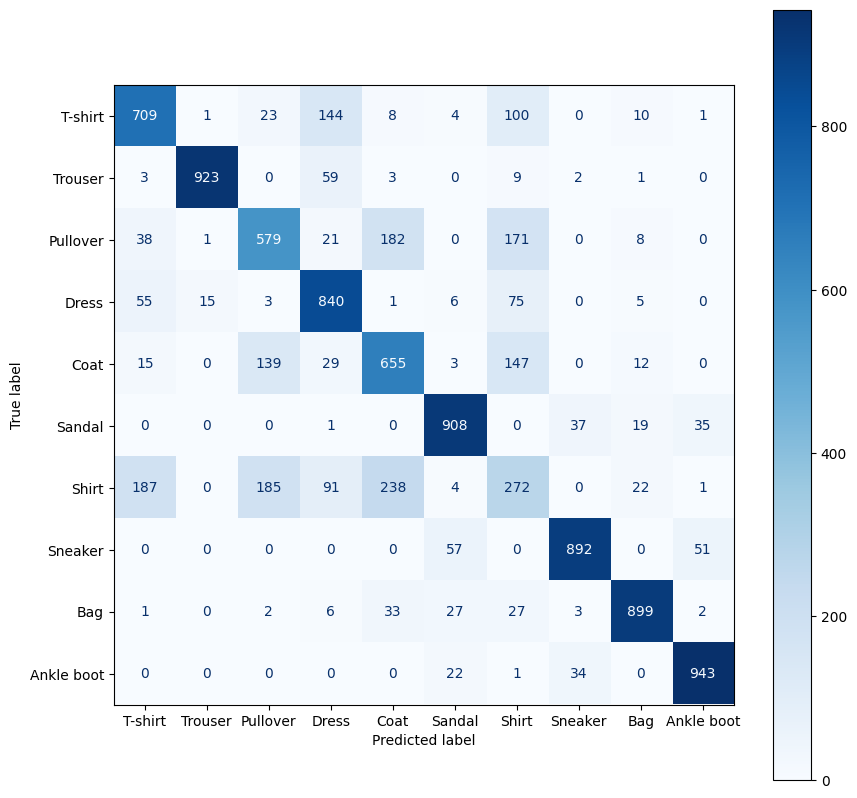

In [143]:
PlotConfusionMatrix(test_labels,y_preds,label_description)

What about seeing image by image, what prediction were made and displaying the actual label that is assigned to them?

In [124]:
def plot_image_prediction(model, image,label, label_description):
  """Displays a random image from the dataset with the predicted label, indicating
  if the prediction was correct by showing the actual label assigned.

  Args:
    model: Trained model with the dataset.
    images: Specific image to be predicted.
    label: Label assigned to this image.
    label_description: Array of possible labels for the dataset.

  """
  # Image label probability prediction.
  flatten_image = image.reshape(1,28, 28)
  predicted_prob = model.predict(flatten_image) # have to reshape to get into right size for model
  predicted_label = label_description[predicted_prob.argmax()]
  actual_label = label_description[label]

  # Plots image
  plt.imshow(image, cmap=plt.cm.binary)

  # Depics correct/miss label
  if predicted_label == actual_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/actual label)
  plt.xlabel("Prediction: {} {:2.0f}% (Actual label: {})".format
               (predicted_label,
               100*tf.reduce_max(predicted_prob),
               actual_label),
               color=color)

Going through different tested elements, we can see how some images are not the easiest to predict. Trousers at [5] is quite clear, but maybe coat at [25] and [50] not so much.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


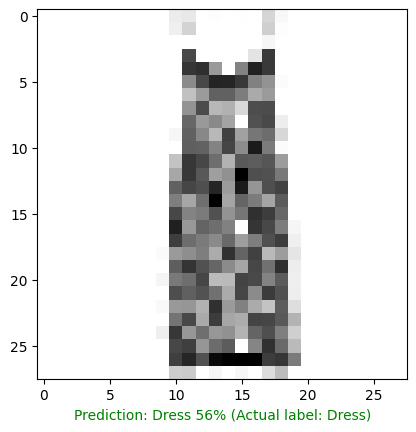

In [157]:
# Check out a random image as well as its prediction
plot_image_prediction(model=model_2,
                  image=test_data_norm[300],
                  label=test_labels[300],
                  label_description=label_description)

Let's try to improve our NN and go back later to see how the confusion matrix and the predictions look like.

### Improving now our results by fine-tuning our hyperparameters

Let's try improving now these results by building some other models and see how they perform.

Before adding more layers and making our architecture more complicated, we could try to adjust the learning rate with different values to see how our NN behaves with the data we are feeding into it, and decide if this could be a good solution for this classification problem.

In [87]:
# Multiclass classification model 3
# Select random seed

tf.random.set_seed(6)

# 1. Create the model.

model_3 = tf.keras.Sequential(
    [ tf.keras.layers.Flatten(input_shape=(28, 28)), 
      tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)])

# 2. Compile the model.

model_3.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy() ,
                optimizer=tf.keras.optimizers.Adam(learning_rate=(1e-4)), # Remember the default value is 1e-3
                metrics=['accuracy'])

# 3. Fit the model
model_3_history = model_3.fit(train_data_norm,train_labels,epochs=10, validation_data=(test_data_norm, test_labels))

/home/david/venv39/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1440 - loss: 2.1262 - val_accuracy: 0.3269 - val_loss: 1.6751
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3592 - loss: 1.5743 - val_accuracy: 0.4729 - val_loss: 1.3660
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5053 - loss: 1.3002 - val_accuracy: 0.5536 - val_loss: 1.1912
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5661 - loss: 1.1457 - val_accuracy: 0.5851 - val_loss: 1.0932
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6020 - loss: 1.0534 - val_accuracy: 0.6189 - val_loss: 1.0168
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6388 - loss: 0.9720 - val_accuracy: 0.6640 - val_loss: 0.9273
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6792 - loss: 0.8793 - val_accuracy: 0.7061 - val_loss: 0.8456
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7160 - loss: 0.8088 - 

In [88]:
# Multiclass classification model 4
# Select random seed

tf.random.set_seed(6)

# 1. Create the model.

model_4 = tf.keras.Sequential(
    [ tf.keras.layers.Flatten(input_shape=(28, 28)), 
      tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)])

# 2. Compile the model.

model_4.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy() ,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics=['accuracy'])

# 3. Fit the model
model_4_history = model_4.fit(train_data_norm,train_labels,epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.1001 - loss: 2.3175 - val_accuracy: 0.1000 - val_loss: 2.3083
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0993 - loss: 2.3152 - val_accuracy: 0.1000 - val_loss: 2.3083
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0992 - loss: 2.3152 - val_accuracy: 0.1000 - val_loss: 2.3083
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0993 - loss: 2.3152 - val_accuracy: 0.1000 - val_loss: 2.3083
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0993 - loss: 2.3152 - val_accuracy: 0.1000 - val_loss: 2.3083
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0992 - loss: 2.3152 - val_accuracy: 0.1000 - val_loss: 2.3083
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0993 - loss: 2.3152 - val_accuracy: 0.1000 - val_loss: 2.3083
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0993 - loss: 2.3152 -

Lets compare results to see how the different models behave

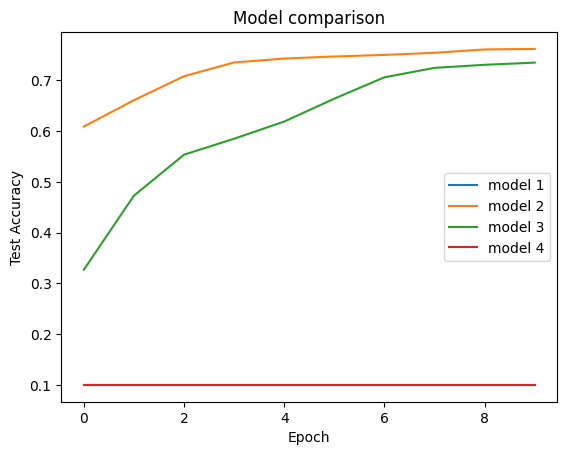

In [89]:
#Comparison of loss in one graph
df_history_model3 = DataframeHistory(model_3_history)
df_history_model4 = DataframeHistory(model_4_history)

plt.plot(df_history_model1['val_accuracy'],label='model 1')
plt.plot(df_history_model2['val_accuracy'],label='model 2')
plt.plot(df_history_model3['val_accuracy'],label='model 3')
plt.plot(df_history_model4['val_accuracy'],label='model 4')

plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Model comparison')
plt.legend()

By comparing the values for validation accuracy, we can see how our model performs when it tries to classify the images that has not seen before within the possible labels that is has been trained to assign. As we see, model 2 and 3 have good values for learning rate that makes it achieve a better accuracy than the other models. Model 2 and 3 also work with normalized data, which brings a better value than model 1. 

Let's try a new model with few more epochs and a learning rate with something in between model 2 and 3.

In [90]:
# Multiclass classification model 5
# Select random seed

tf.random.set_seed(6)

# 1. Create the model.

model_5 = tf.keras.Sequential(
    [ tf.keras.layers.Flatten(input_shape=(28, 28)), 
      tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)])

# 2. Compile the model.

model_5.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy() ,
                optimizer=tf.keras.optimizers.Adam(learning_rate=(5e-4)), # Remember the default value is 1e-3
                metrics=['accuracy'])

# 3. Fit the model
model_5_history = model_5.fit(train_data_norm,train_labels,epochs=30, validation_data=(test_data_norm, test_labels))

/home/david/venv39/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1659 - loss: 2.1334 - val_accuracy: 0.2643 - val_loss: 1.7337
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2956 - loss: 1.6743 - val_accuracy: 0.4658 - val_loss: 1.3796
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5528 - loss: 1.2384 - val_accuracy: 0.5979 - val_loss: 1.0726
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6220 - loss: 1.0222 - val_accuracy: 0.6390 - val_loss: 0.9791
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6647 - loss: 0.9038 - val_accuracy: 0.6858 - val_loss: 0.8341
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6913 - loss: 0.7920 - val_accuracy: 0.6917 - val_loss: 0.7935
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6991 - loss: 0.7557 - val_accuracy: 0.6989 - val_loss: 0.7658
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7056 - loss: 0.7312 - 

Our new model with a learning rate of 5e-4 was already performing a bit better by the 10th epoch, in comparison with the model 2 and 3. More epochs made it also improve the accuracy and the validation accuracy as well, meaning the NN was performing well on its learning capabilities and still had some room for improving. What if we make it to 100 epochs? 

In [136]:
# Multiclass classification model 6 - 100 epochs
# Select random seed

tf.random.set_seed(6)

# 1. Create the model.

model_6 = tf.keras.Sequential(
    [ tf.keras.layers.Flatten(input_shape=(28, 28)), 
      tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)])

# 2. Compile the model.

model_6.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy() ,
                optimizer=tf.keras.optimizers.Adam(learning_rate=(5e-4)), # Remember the default value is 1e-3
                metrics=['accuracy'])

# 3. Fit the model
model_6_history = model_6.fit(train_data_norm,train_labels,epochs=100, validation_data=(test_data_norm, test_labels),verbose=0)

/home/david/venv39/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [137]:
print("accuracy:",model_6_history.history['accuracy'][99],
      "loss:",model_6_history.history['loss'][99],
      "validation accuracy:",model_6_history.history['val_accuracy'][99],
      "validation loss:",model_6_history.history['val_loss'][99])

accuracy: 0.8169999718666077 loss: 0.49107232689857483 validation accuracy: 0.7907999753952026 validation loss: 0.5727142691612244


These results are a bit better, but not perfect yet. For now, let's check how the confusion matrix and predictions look for the latest model.

In [147]:
# Make predictions with the most recent model
y_probabilities_model_6 = model_6.predict(test_data_norm)

# We convert our matrix of probabilites into and array of labels.
y_preds_model_6 = y_probabilities_model_6.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


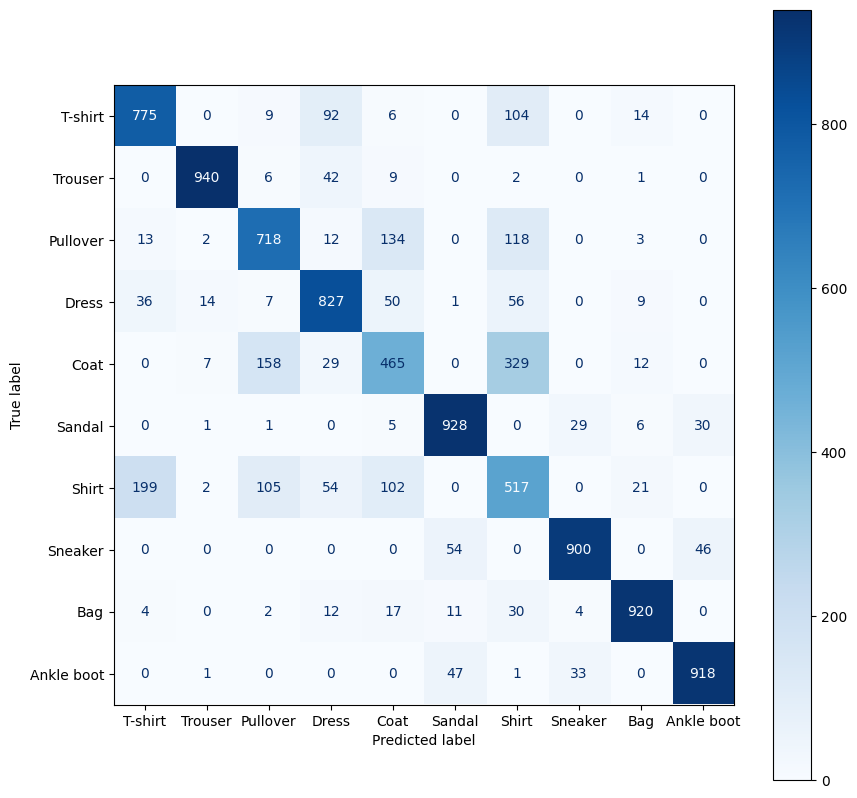

In [148]:
PlotConfusionMatrix(test_labels,y_preds_model_6,label_description)

The confusion matrix already looks better. We can see that on one hand, different clothes wrongly predicted as coats are less. On the other hand, we can see that also coats has less true positives, meaning that is wrongly labeled now more as other elements ( specially as shirts). 

Overall, we can see an improvement ( as the validation accuracy points) to general possitive predictions, but still there is some margin of error.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


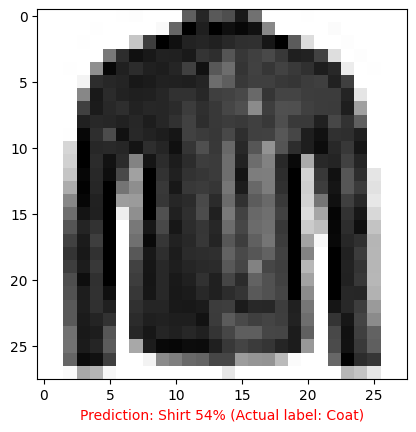

In [178]:
# Check out a random image as well as its prediction
plot_image_prediction(model=model_6,
                  image=test_data_norm[50],
                  label=test_labels[50],
                  label_description=label_description)

Let's try to end this notebook by making a more efficient model.
For this last model, we are going to increase the number of neurons per layer. We will also use [dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) to help with the efectiveness of our training, avoiding overfitting.

In [169]:
# Multiclass classification model 7 - 20 epochs, more layers
# Select random seed

tf.random.set_seed(6)

# 1. Create the model.

model_7 = tf.keras.Sequential(
    [ tf.keras.layers.Flatten(input_shape=(28, 28)), 
      tf.keras.layers.Dense(128,activation=tf.keras.activations.relu),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(64,activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)])

# 2. Compile the model.

model_7.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy() ,
                optimizer=tf.keras.optimizers.Adam(learning_rate=(7e-4)), # Remember the default value is 1e-3
                metrics=['accuracy'])

# 3. Fit the model
model_7_history = model_7.fit(train_data_norm,train_labels,epochs=10, validation_data=(test_data_norm, test_labels),verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6861 - loss: 0.8863 - val_accuracy: 0.8393 - val_loss: 0.4449
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8214 - loss: 0.4931 - val_accuracy: 0.8462 - val_loss: 0.4236
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8337 - loss: 0.4511 - val_accuracy: 0.8575 - val_loss: 0.4017
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8453 - loss: 0.4244 - val_accuracy: 0.8625 - val_loss: 0.3887
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8510 - loss: 0.4084 - val_accuracy: 0.8667 - val_loss: 0.3807
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8567 - loss: 0.3921 - val_accuracy: 0.8660 - val_loss: 0.3723
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8593 - loss: 0.3844 - val_accuracy: 0.8689 - val_loss: 0.3668
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8605 - loss: 0.3769 - 

We can see how with only 20 epochs, we have managed to make the best model so far thanks to the increase of the number of neurons. Selecting a good learning rate from previous experiments has been useful as well. Let's see the confusion matrix and try again some predictions to see how it performs.

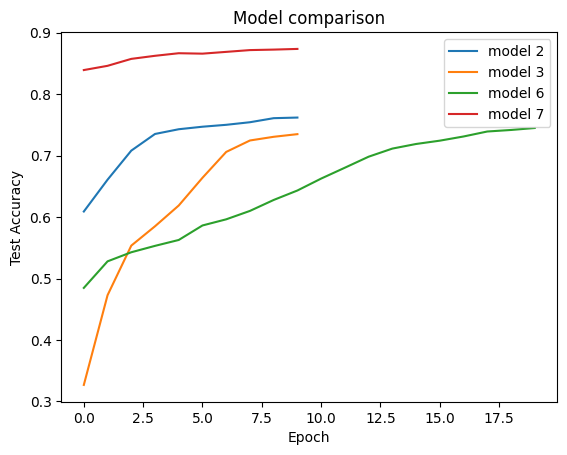

In [175]:
df_history_model6 = DataframeHistory(model_6_history)
df_history_model7 = DataframeHistory(model_7_history)

plt.plot(df_history_model2['val_accuracy'],label='model 2')
plt.plot(df_history_model3['val_accuracy'],label='model 3')
plt.plot(df_history_model6['val_accuracy'],label='model 6')
plt.plot(df_history_model7['val_accuracy'],label='model 7')

plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Model comparison')
plt.legend()

In [176]:
# Make predictions with the most recent model
y_probabilities_model_7 = model_7.predict(test_data_norm)

# We convert our matrix of probabilites into and array of labels.
y_preds_model_7 = y_probabilities_model_7.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


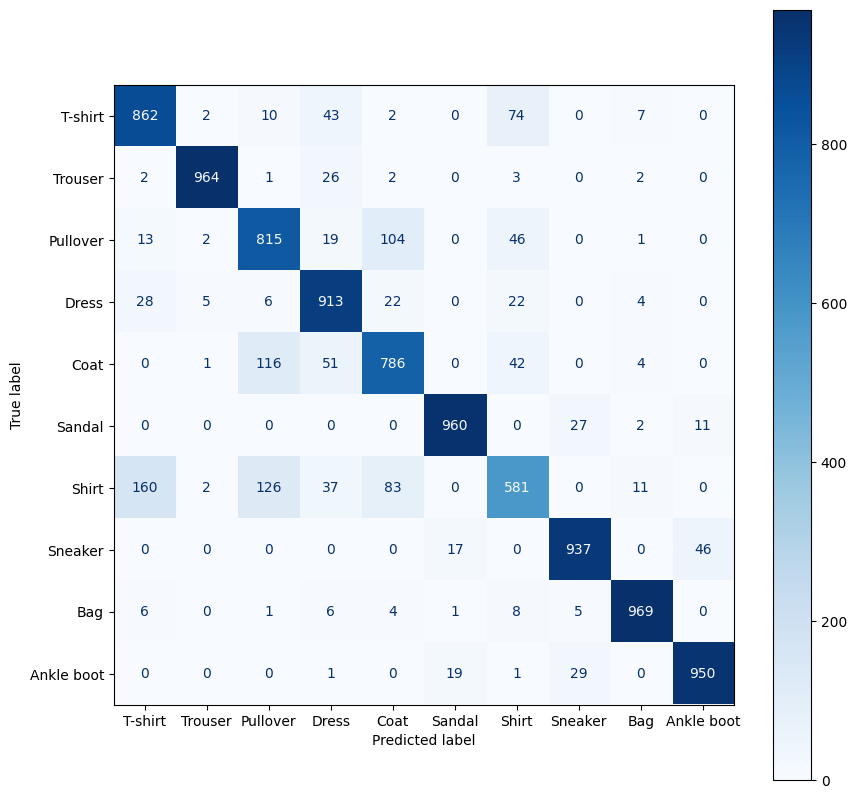

In [177]:
PlotConfusionMatrix(test_labels,y_preds_model_7,label_description)

The latest confusion matrix looks the best so far as our validation accuracy was appointing already. We can see how coat images are finally getting predicted more effectively. We can check with the images that were failing before:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


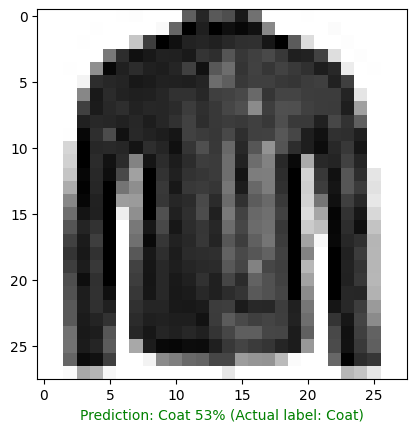

In [179]:
# Check out a random image as well as its prediction
plot_image_prediction(model=model_7,
                  image=test_data_norm[50],
                  label=test_labels[50],
                  label_description=label_description)

For now, we can be happy with these results. In the case of having a neural network we want to save the results, we can save our model.

## Save our model

Back in TF-NNbasics, we explained the different formats to save our model. Let's first quickly do so with the [Keras format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format).

In [186]:
!mkdir -p saved_models

In [185]:
model_7.save('saved_models/model_7_fashion_mnist.keras')

To understand better what we just saved in this file, you can go check this other file in my tensorflow basics folder.